# Fine-tuning

Retrain an existing model to find ring galaxies

## Setup

In [6]:
from pathlib import Path
import numpy as np
import pandas as pd
import os
import logging
from datetime import datetime
import h5py
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image, display

Importing project modules works best from the project root directory.

In [9]:
os.chdir('..')

import zoobot
import projcode
from projcode.data.utils import read_params
from projcode.finetune.finetune_minimal import FineTune

In [11]:
params = read_params()

coderoot = Path(params['coderoot'])
dataroot = Path(params['dataroot'])
csv_path = coderoot / 'data/example_ring_catalog_basic.csv'
pretrained_checkpoint = dataroot / 'results/best_training/decals/checkpoint'
save_loc = dataroot / f'results/finetune/minimal_{datetime.now().strftime("%Y%m%d-%H%M%S")}'
save_loc.mkdir(parents=True)
logging.info(f"Output to {save_loc}")

ft = FineTune(params)
ft.setup_data(csv_path)

Logging to /home/colin/data/munch1tb/zoobot_data/logfiles/finetune.log


The ring catalog stores relative paths to the image files. This is brittle, so convert to absolute paths:

In [19]:
ft.paths_train = [str(coderoot / x) for x in ft.paths_train]
ft.paths_val = [str(coderoot / x) for x in ft.paths_val]

Convert catalog and images to a format suitable for the model.

(There seems to be a stray print statement in the zoobot code which I am still trying to find and delete.)

In [20]:
ft.preprocess_data()

[{'label': <tf.Tensor: shape=(64,), dtype=int32, numpy=
array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1],
      dtype=int32)>}]


[{'label': <tf.Tensor: shape=(64,), dtype=int32, numpy=
array([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1],
      dtype=int32)>}]


Load the existing pretrained DECaLS model and freeze most of the layers:

In [21]:
ft.load_old_model(pretrained_checkpoint)

Train the final few layers against the ring catalog to give ring/no-ring output:

In [22]:
%time ft.retrain(save_loc)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 7, 7, 1280)        4048989   
                                                                 
 sequential_2 (Sequential)   (None, 1)                 86209     
                                                                 
Total params: 4,135,198
Trainable params: 86,209
Non-trainable params: 4,048,989
_________________________________________________________________


2022-05-08 11:22:47.303529: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 69120000 exceeds 10% of free system memory.
2022-05-08 11:22:47.304023: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 97689600 exceeds 10% of free system memory.
2022-05-08 11:22:47.469168: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 69120000 exceeds 10% of free system memory.
2022-05-08 11:22:47.469419: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 97689600 exceeds 10% of free system memory.
2022-05-08 11:22:47.580633: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 69120000 exceeds 10% of free system memory.


Epoch 1/80


2022-05-08 11:22:55.214611: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8400
2022-05-08 11:22:55.754645: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory



 Ending step:  0.0
6/6 - 14s - loss: 0.7137 - accuracy: 0.5319 - val_loss: 0.6856 - val_accuracy: 0.6277 - 14s/epoch - 2s/step
Epoch 2/80

 Ending step:  64.0
6/6 - 4s - loss: 0.6967 - accuracy: 0.5346 - val_loss: 0.6788 - val_accuracy: 0.7074 - 4s/epoch - 599ms/step
Epoch 3/80

 Ending step:  128.0
6/6 - 4s - loss: 0.6993 - accuracy: 0.5186 - val_loss: 0.6745 - val_accuracy: 0.7713 - 4s/epoch - 613ms/step
Epoch 4/80

 Ending step:  192.0
6/6 - 3s - loss: 0.6756 - accuracy: 0.5745 - val_loss: 0.6689 - val_accuracy: 0.7660 - 3s/epoch - 546ms/step
Epoch 5/80

 Ending step:  256.0
6/6 - 3s - loss: 0.6721 - accuracy: 0.5691 - val_loss: 0.6628 - val_accuracy: 0.7660 - 3s/epoch - 558ms/step
Epoch 6/80

 Ending step:  320.0
6/6 - 3s - loss: 0.6784 - accuracy: 0.5426 - val_loss: 0.6543 - val_accuracy: 0.7660 - 3s/epoch - 521ms/step
Epoch 7/80

 Ending step:  384.0
6/6 - 4s - loss: 0.6637 - accuracy: 0.5878 - val_loss: 0.6460 - val_accuracy: 0.7660 - 4s/epoch - 585ms/step
Epoch 8/80

 Ending s

In [25]:
predictions_loc = str(dataroot / f'predictions/finetune/minimal_{datetime.now().strftime("%Y%m%d-%H%M%S")}.csv')
# predictions_loc.mkdir(parents=True)
logging.info(f"Predictions to {predictions_loc}")

In [26]:
ft.make_predictions(ft.paths_val, predictions_loc)

In [29]:
df = pd.read_csv(predictions_loc)
df

,prediction,image_loc
0,0.618028,/home/colin/code/galaxycnn/proj502/data/exampl...
1,0.602566,/home/colin/code/galaxycnn/proj502/data/exampl...
2,0.040107,/home/colin/code/galaxycnn/proj502/data/exampl...
3,0.562217,/home/colin/code/galaxycnn/proj502/data/exampl...
4,0.304348,/home/colin/code/galaxycnn/proj502/data/exampl...
...,...,...
89,0.651304,/home/colin/code/galaxycnn/proj502/data/exampl...
90,0.684478,/home/colin/code/galaxycnn/proj502/data/exampl...
91,0.569146,/home/colin/code/galaxycnn/proj502/data/exampl...
92,0.552041,/home/colin/code/galaxycnn/proj502/data/exampl...


In [31]:
sorted = df.sort_values(by=['prediction'], ascending=False)
sorted.head(10)

,prediction,image_loc
90,0.684478,/home/colin/code/galaxycnn/proj502/data/exampl...
43,0.673288,/home/colin/code/galaxycnn/proj502/data/exampl...
27,0.657942,/home/colin/code/galaxycnn/proj502/data/exampl...
73,0.655788,/home/colin/code/galaxycnn/proj502/data/exampl...
67,0.654310,/home/colin/code/galaxycnn/proj502/data/exampl...
10,0.651726,/home/colin/code/galaxycnn/proj502/data/exampl...
89,0.651304,/home/colin/code/galaxycnn/proj502/data/exampl...
34,0.648263,/home/colin/code/galaxycnn/proj502/data/exampl...
71,0.646971,/home/colin/code/galaxycnn/proj502/data/exampl...
54,0.646165,/home/colin/code/galaxycnn/proj502/data/exampl...


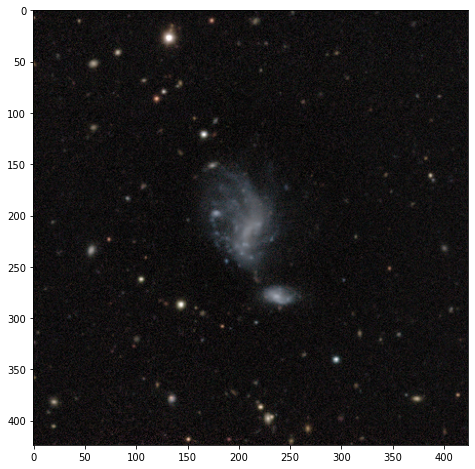

In [45]:
file_loc = sorted['image_loc'][2]
img = mpimg.imread(file_loc)
fig = plt.figure(figsize=(8,8))
imgplot = plt.imshow(img)